# Classification of EMOTIV EPOC 3 classes

## Import Library

In [42]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(sys.executable)

/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/bin/python


In [2]:
import torch
print(torch.cuda.is_available()) 

True


## Data Ingestion from Kaggle

In [3]:
# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Dataset path
kaggle_dataset = 'drammaraalhamadani/emotiv-epoc-3-classes'
output_dir = './kaggle_downloads'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Download and unzip all files from the Kaggle dataset (download everything at once)
print("Downloading and unzipping all files from the dataset...")
api.dataset_download_files(kaggle_dataset, path=output_dir, force=True, unzip=True)
print("All files downloaded and unzipped to:", output_dir)

Dataset URL: https://www.kaggle.com/datasets/drammaraalhamadani/emotiv-epoc-3-classes
All files downloaded and unzipped to: ./kaggle_downloads


## Data Collection


### user_a

In [4]:
a = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_a.csv")
print(a.head(3))
print(a.shape)
print(a.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3569.164550  2063.892754  1.673726  4.444736  0.526209  3.002088   
1    1.0  3568.423670  2063.099248  1.897790  3.728823  1.304186  1.854353   
2    1.0  3568.157929  2062.445859  2.798014  2.574504  1.120537  1.958819   

      AF3.6     AF3.7           F7  ...       F8.6       F8.7          AF4  \
0  1.425022  3.302739  3563.803888  ...  45.468326  72.508750  3701.186330   
1  1.366575  2.546458  3563.560922  ...  36.551948  66.931186  3725.210509   
2  0.982433  2.258622  3563.279981  ...  40.754308  66.816547  3724.417296   

         AF4.1      AF4.2      AF4.3      AF4.4      AF4.5      AF4.6  \
0  2182.676835  18.192418  41.349662  16.004756  42.046467  46.280843   
1  2180.197439   8.820788  38.012788  19.601233  29.431054  38.559351   
2  2176.823208  18.159202  23.612639  14.378291  19.555084  43.210004   

       AF4.7  
0  73.565719  
1  67.470041  
2  67.781924  

[3 rows x 113 column

### user_b

In [5]:
b = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_b.csv")
print(b.head(3))
print(b.shape)
print(b.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    2.0  3577.872723  2067.408557  1.025738  1.744496  0.883469  1.282893   
1    2.0  3577.830179  2066.857321  0.573598  1.711991  1.012575  1.900513   
2    2.0  3576.706494  2066.736837  0.525896  1.584096  0.201467  1.038686   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  3.039058  2.730998  3568.553050  ...     NaN     NaN     NaN      NaN   
1  2.746218  3.066821  3569.060181  ...     NaN     NaN     NaN      NaN   
2  2.685631  2.977552  3569.214969  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

### user_c

In [6]:
c = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_c.csv")
print(c.head(3))
print(c.shape)
print(c.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3573.336166  2067.827798  1.334973  2.294574  0.742210  2.052755   
1    1.0  3569.424197  2063.871329  1.639684  2.573080  1.097168  2.678287   
2    1.0  3570.767652  2064.654687  0.706498  2.613442  1.086770  2.222977   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  3.604952  4.854279  3575.508401  ...     NaN     NaN     NaN      NaN   
1  2.313650  4.727548  3573.524571  ...     NaN     NaN     NaN      NaN   
2  2.409857  4.936480  3573.935350  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

### user_d

In [7]:
d = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_d.csv")
print(d.head(3))
print(d.shape)
print(d.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3566.375438  2062.665095  1.040973  2.574824  1.376404  1.657806   
1    1.0  3565.986713  2061.826341  1.347088  2.154989  0.904145  2.603965   
2    1.0  3566.977885  2062.639807  1.083747  2.186981  1.155864  2.293261   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  0.933377  2.429998  3564.653552  ...     NaN     NaN     NaN      NaN   
1  1.175508  2.292886  3564.071577  ...     NaN     NaN     NaN      NaN   
2  1.144330  2.107225  3564.207493  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

## Data Cleaning

### Data Profiling

In [8]:
import _bz2
from ydata_profiling import ProfileReport
profile = ProfileReport(a)
profile.to_file("report.html")

/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Summarize dataset: 100%|█████████▉| 12663/12666 [13:45<00:00,  4.74it/s, Detecting duplicates]   /home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[duplicated_rows]
/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[duplicated_rows]
/home/q

### Missing value

In [9]:
missing_values = a.isnull().sum()
missing_percentage = (missing_values / len(a)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_data)

,Missing Values,Percentage
Class,0,0.0
AF3,0,0.0
AF3.1,0,0.0
AF3.2,0,0.0
AF3.3,0,0.0
...,...,...
AF4.3,0,0.0
AF4.4,0,0.0
AF4.5,0,0.0
AF4.6,0,0.0


### Duplicate value

In [10]:
a.duplicated().sum()

np.int64(0)

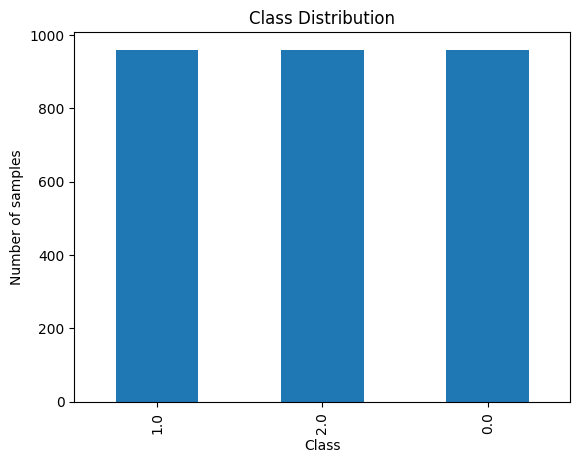

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
a['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()


## Choose Classification Model

- XGBoost
- Random Forest 
- Support vector machine (SVM) 
- K-nearest Neighbors (KNN) 
- Multilayer perceptron (MLP)

************************Compare Classification Algorithms*************************
Random Forest: 0.8581 (0.0305)
SVM: 0.3134 (0.0313)
KNN: 0.8090 (0.0272)
MLP: 0.3446 (0.0209)


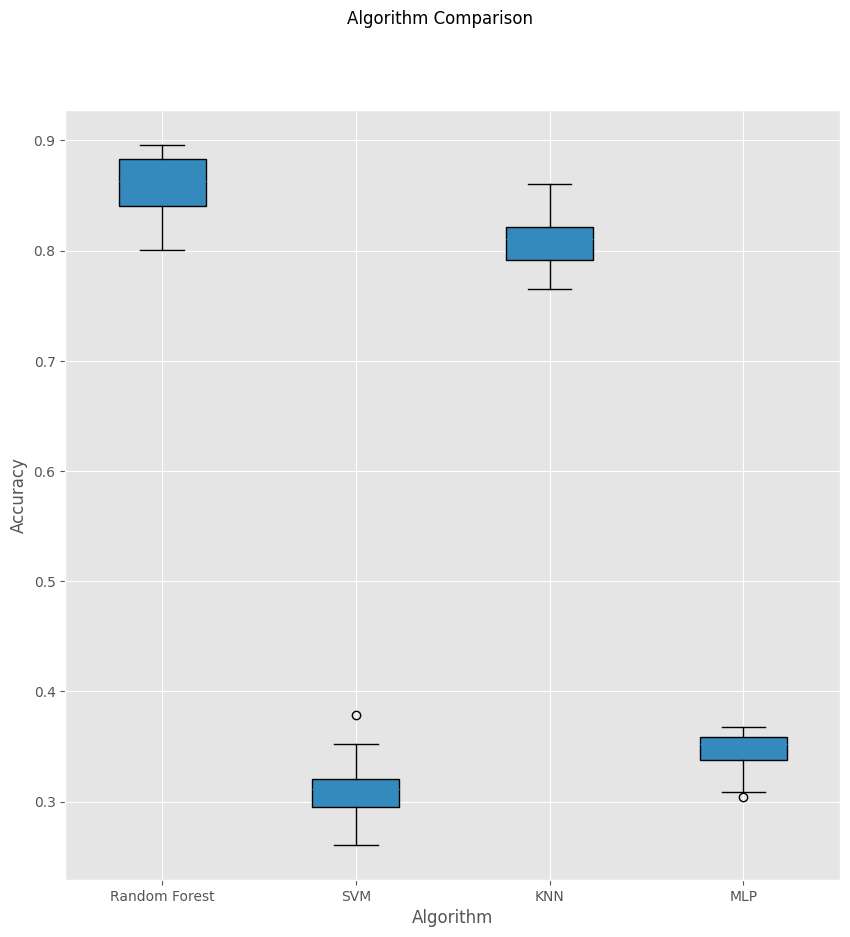

In [35]:
def choose_models():
    print(format("Compare Classification Algorithms", "*^82"))
    plt.style.use('ggplot')
    
    X = a.drop(columns=['Class'])
    y = a['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Prepare the models
    models = []
    models.append(('Random Forest', RandomForestClassifier()))
    models.append(('SVM', SVC()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('MLP', MLPClassifier()))

    # Evaluate each model
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

    # Boxplot algorithm comparison
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results, vert=True, patch_artist=True)
    ax.set_xticklabels(names)
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.show()
choose_models()

Bước	Mức độ quan trọng	Khi nào cần?
1. Missing Values	⭐⭐⭐⭐⭐	Luôn cần
2. Categorical Encoding	⭐⭐⭐⭐⭐	Nếu có categorical data
3. Outliers	⭐⭐⭐⭐	Với thuật toán nhạy cảm (SVM, Logistic)
4. Scaling	⭐⭐⭐⭐	Với KNN, SVM, Neural Networks
5. Imbalanced Data	⭐⭐⭐	Nếu lớp mất cân bằng nặng
6. Duplicates	⭐⭐	Nếu dữ liệu có trùng lặp
7. Feature Correlation	⭐⭐	Nếu có features tương quan cao
8. Text Cleaning	⭐	Chỉ khi có text data
9. Datetime Handling	⭐	Chỉ khi có ngày tháng

## RandomForest

In [44]:
X = a.drop(columns=['Class'])
y = a['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác trên tập kiểm tra: {accuracy:.2f}")
print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))
# feature_importances = model.feature_importances_
# print("Important features:", feature_importances)
# Lỗi Out-of-Bag (OOB) - chỉ áp dụng khi oob_score=True
print(f"OOB Score: {model.oob_score_:.2f}")

Độ chính xác trên tập kiểm tra: 0.82
Báo cáo phân loại:
               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       209
         1.0       0.77      0.81      0.79       183
         2.0       0.79      0.82      0.80       184

    accuracy                           0.82       576
   macro avg       0.82      0.82      0.82       576
weighted avg       0.82      0.82      0.82       576

OOB Score: 0.83


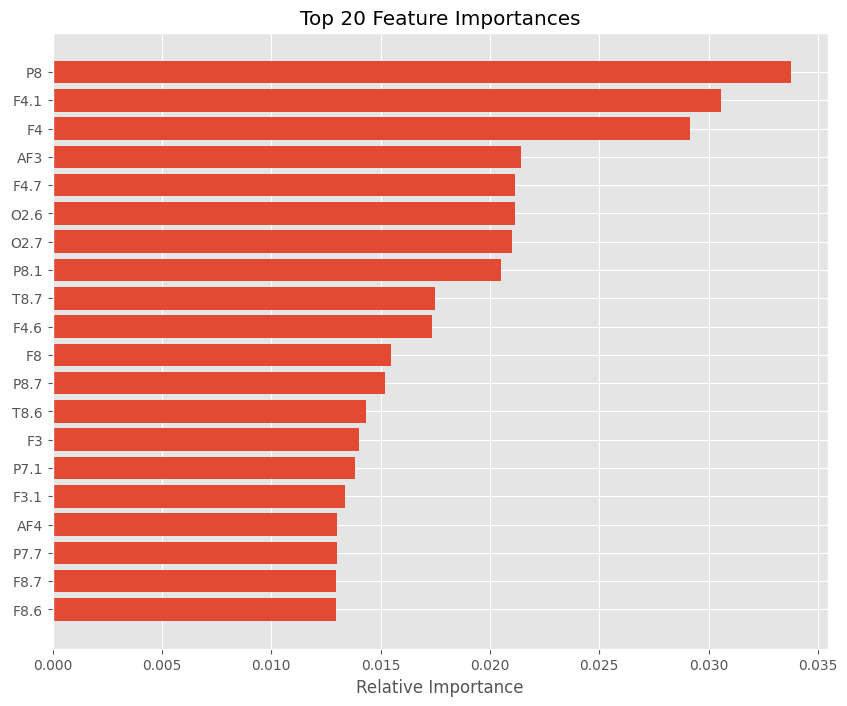

In [41]:
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20
plt.figure(figsize=(10, 8))
plt.title("Top 20 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
